In [22]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, plot_confusion_matrix

=== Coletando os dados: Usado uma base de dados referente a Diabetes ===

In [23]:
#visualizar a base de dados
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
#VERIFICANDO SE POSSUI ELEMENTOS FALTANTES NO DATAFRAME

print(f"Elementos faltantes:\n{df.isna().sum()}\n") 
#imputer = SimpleImputer(strategy='mean')
#df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]] = imputer.fit_transform(df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]])


#VERIFICANDO SE POSSUI VARIÁVEL CATEGÓRICA NO DATAFRAME

coluna_categorica = df.select_dtypes(include=['object']) #usado para selecionar todas as colunas de tipo 'object' no DataFrame. 

if coluna_categorica.empty:
    print("Não possui variáveis categóricas no DataFrame.")
else:
    print("Variáveis categóricas nas colunas fornecidas:")
    print(coluna_categorica)

Elementos faltantes:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Não possui variáveis categóricas no DataFrame.


=== Dividindo o DataFrame em Treino e Teste ===

In [25]:
#As colunas: ["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"] são as váriaveis independentes
#A coluna ("Outcome" representa se um paciente tem diabetes ou não)
#Regressao logistica é uma técnica que usa matematica para encontrar relações entre dois fatores. 
#Depois é usada para prever o valor de um desses fatores com base no outro.

XTrain, XTest, yTrain, yTest = train_test_split(df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]], df["Outcome"], test_size = 0.2)

In [26]:
model = LogisticRegression()
model.fit(XTrain, yTrain)

LogisticRegression()

=== Avaliando o modelo ===

In [27]:
yPred = model.predict(XTest) #realiza as previsoes no modelo treinado

dfComparacao = pd.DataFrame(yTest) 
dfComparacao["Predição"] = yPred
print(dfComparacao)

#A acurácia mede a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.
# Quanto mais alta a acurácia, melhor o desempenho do modelo em fazer previsões precisas
accuracy = accuracy_score(yTest, yPred)

# A precisão se concentra em quão precisas são as previsões positivas do modelo. 
#A precisão é uma métrica importante, especialmente em casos em que prever falsos positivos é indesejável
#Quanto maior a precisão, melhor o modelo é em evitar previsões positivas incorretas.
precision = precision_score(yTest, yPred) 

# O recall se concentra em quão bem o modelo é capaz de capturar todas as instâncias positivas do conjunto de dados.
# O recall é uma métrica importante, especialmente em situações em que a não detecção de instâncias positivas (falsos negativos) é indesejável. 
# Quanto maior o recall, melhor o modelo é em identificar corretamente as instâncias positivas.
recall = recall_score(yTest, yPred) 

#F1_Score é uma métrica que combina a precisão (proporção de previsões positivas corretas) e o recall (proporção de instâncias positivas reais que foram corretamente identificadas pelo modelo) em um único valor.
# Essa métrica fornece um equilíbrio entre precisão e recall.
#Um valor alto de F1-Score indica um equilíbrio positivo entre a precisão e o recall do modelo.
f1 = f1_score(yTest, yPred) 

print(f"\nAcurácia: {accuracy}")
print(f"\nPrecisão: {precision}")
print(f"\nRecall: {recall}")
print(f"\nF1-score: {f1}")

     Outcome  Predição
396        0         0
712        1         1
423        0         0
254        1         0
475        0         1
..       ...       ...
659        1         0
266        1         1
552        0         0
621        0         0
413        0         0

[154 rows x 2 columns]

Acurácia: 0.7142857142857143

Precisão: 0.6808510638297872

Recall: 0.5245901639344263

F1-score: 0.5925925925925926


=== Visualização === 

     Verdadeiro  Predição
396           0         0
712           1         1
423           0         0
254           1         0
475           0         1
..          ...       ...
659           1         0
266           1         1
552           0         0
621           0         0
413           0         0

[154 rows x 2 columns]
Acurácia: 0.7142857142857143
Precisão: 0.6808510638297872
Recall: 0.5245901639344263
F1-score: 0.5925925925925926


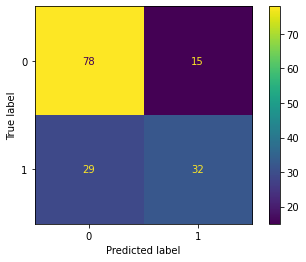

In [28]:
yPred = model.predict(XTest)

df_resultado = pd.DataFrame({'Verdadeiro': yTest, 'Predição': yPred})
print(df_resultado)

accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Calcule a matriz de confusão usando sklearn
matriz = confusion_matrix(yTest, yPred)

# Crie uma exibição da matriz de confusão e a exiba
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()
plt.show()


=== Observações === 

Acurácia: 0.7532 = Isso significa que 75,32% das previsões feitas pelo modelo estão corretas em relação ao conjunto de teste.


Precisão: 0.7 =  O nosso modelo prevê a presença de diabetes e está correto em cerca de 70% das vezes.


Recall: 0.5185 = O modelo é capaz de identificar corretamente cerca de 51,85% das instâncias de diabetes no conjunto de teste. O modelo pode não estar capturando todas as instâncias de diabetes, o que pode resultar em falsos negativos.


F1-score: 0.59 = Indica um equilíbrio razoável entre precisão e recall.